<a href="https://colab.research.google.com/github/maskot1977/Python2020/blob/1202/75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Mon Jan  4 03:52:42 UTC 2021


In [2]:
import gspread
print(gspread.__version__)

3.0.1


In [3]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [4]:
ss_url = "https://docs.google.com/spreadsheets/d/1u50kS8Ztmgjjs--S1AM4753quL3QEPRR7xIGjCxcSCw/edit#gid=941271295"

In [5]:
workbook = gc.open_by_url(ss_url)
workbook

<Spreadsheet 'Questionary' id:1u50kS8Ztmgjjs--S1AM4753quL3QEPRR7xIGjCxcSCw>

In [6]:
worksheet = workbook.get_worksheet(0)
worksheet

<Worksheet 'Form Responses 1' id:941271295>

In [7]:
import gspread_dataframe as gs_df
df = gs_df.get_as_dataframe(worksheet)
df

,Timestamp,Score,Pen name,Q1. Gender,Q2. 高校時代の英語の偏差値はどのくらい？,Q3. 高校時代の国語の偏差値はどのくらい？,Q4. 高校時代の数学の偏差値はどのくらい？,Q5. 高校時代の理科の偏差値はどのくらい？,Q6. 高校時代の社会の偏差値はどのくらい？,Q7. 高校時代の体育の成績を５段階評価で表すと？,Q8. 高校時代、勉強がどのくらい好きだったか５段階評価で,Q9. 浪人経験はありますか？,Q10. 今の大学は第一希望でしたか？,Q11. 今、実家暮らし？一人暮らし？,Q12. 大学への通学時間は？（単位：分）,Q13. 朝ごはんは週何回くらい食べてる？,Q14. １日あたりの睡眠時間は平均何時間？,Q15. 大学の成績(GPA)は？,Q16. 今、バイトは週何時間くらい？,Q17. 部活（またはサークル活動）は週何時間？,Q18. 彼氏または彼女はいる？,Q19. あなたはリア充ですか？５段階評価で,Unnamed: 22,Q20. 上記以外に、加えて欲しい質問項目などがありましたら教えてください。
0,5/18/2017 13:28:25,0.0,pp,男性 Male,50.0,50.0,55.0,60.0,60.0,4.0,3.0,ない（現役合格）,第二希望,実家,60.0,7.0,6.0,2.8,4.0,20.0,いる（２次元）,2.0,NaN,NaN
1,5/18/2017 13:28:37,0.0,chimp,男性 Male,70.0,60.0,70.0,70.0,60.0,4.0,3.0,ない（現役合格）,第一希望,実家,90.0,7.0,5.0,3.2,6.5,6.0,いない,1.0,NaN,NaN
2,5/18/2017 13:37:00,0.0,あんぱん,男性 Male,80.0,70.0,65.0,70.0,50.0,5.0,3.0,ない（現役合格）,第二希望,実家,90.0,7.0,6.0,2.4,0.0,15.0,いない,3.0,NaN,NaN
3,5/18/2017 13:40:12,0.0,あかさたな,男性 Male,40.0,50.0,55.0,55.0,50.0,3.0,3.0,ない（現役合格）,第一希望,一人,30.0,5.0,6.0,2.0,10.0,8.0,いる（リアル）,2.0,NaN,NaN
4,5/18/2017 13:37:35,0.0,rrr,男性 Male,65.0,60.0,70.0,65.0,50.0,5.0,3.0,１浪,第一希望,実家,120.0,7.0,6.0,2.8,12.0,2.0,いない,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2 = df[~df['Timestamp'].isnull()]
df2

,Timestamp,Score,Pen name,Q1. Gender,Q2. 高校時代の英語の偏差値はどのくらい？,Q3. 高校時代の国語の偏差値はどのくらい？,Q4. 高校時代の数学の偏差値はどのくらい？,Q5. 高校時代の理科の偏差値はどのくらい？,Q6. 高校時代の社会の偏差値はどのくらい？,Q7. 高校時代の体育の成績を５段階評価で表すと？,Q8. 高校時代、勉強がどのくらい好きだったか５段階評価で,Q9. 浪人経験はありますか？,Q10. 今の大学は第一希望でしたか？,Q11. 今、実家暮らし？一人暮らし？,Q12. 大学への通学時間は？（単位：分）,Q13. 朝ごはんは週何回くらい食べてる？,Q14. １日あたりの睡眠時間は平均何時間？,Q15. 大学の成績(GPA)は？,Q16. 今、バイトは週何時間くらい？,Q17. 部活（またはサークル活動）は週何時間？,Q18. 彼氏または彼女はいる？,Q19. あなたはリア充ですか？５段階評価で,Unnamed: 22,Q20. 上記以外に、加えて欲しい質問項目などがありましたら教えてください。
0,5/18/2017 13:28:25,0.0,pp,男性 Male,50.0,50.0,55.0,60.0,60.0,4.0,3.0,ない（現役合格）,第二希望,実家,60.0,7.0,6.0,2.8,4.0,20.0,いる（２次元）,2.0,NaN,NaN
1,5/18/2017 13:28:37,0.0,chimp,男性 Male,70.0,60.0,70.0,70.0,60.0,4.0,3.0,ない（現役合格）,第一希望,実家,90.0,7.0,5.0,3.2,6.5,6.0,いない,1.0,NaN,NaN
2,5/18/2017 13:37:00,0.0,あんぱん,男性 Male,80.0,70.0,65.0,70.0,50.0,5.0,3.0,ない（現役合格）,第二希望,実家,90.0,7.0,6.0,2.4,0.0,15.0,いない,3.0,NaN,NaN
3,5/18/2017 13:40:12,0.0,あかさたな,男性 Male,40.0,50.0,55.0,55.0,50.0,3.0,3.0,ない（現役合格）,第一希望,一人,30.0,5.0,6.0,2.0,10.0,8.0,いる（リアル）,2.0,NaN,NaN
4,5/18/2017 13:37:35,0.0,rrr,男性 Male,65.0,60.0,70.0,65.0,50.0,5.0,3.0,１浪,第一希望,実家,120.0,7.0,6.0,2.8,12.0,2.0,いない,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,10/20/2020 9:13:45,0.0,おむれつ,女性 Female,60.0,60.0,60.0,60.0,60.0,3.0,4.0,ない（現役合格）,第一希望,一人,10.0,6.0,5.0,2.0,20.0,0.0,いない,3.0,NaN,NaN
768,10/27/2020 9:37:13,0.0,melon,男性 Male,75.0,60.0,80.0,80.0,40.0,5.0,5.0,ない（現役合格）,第一希望,実家,60.0,7.0,5.0,3.0,20.0,0.0,いる（リアル）,5.0,NaN,NaN
769,10/28/2020 15:13:58,0.0,meeeee,男性 Male,70.0,70.0,70.0,70.0,60.0,2.0,2.0,１浪,第一希望,一人,15.0,7.0,5.0,2.5,10.0,5.0,いない,5.0,NaN,NaN
770,12/3/2020 15:00:51,0.0,Kui,女性 Female,60.0,50.0,60.0,65.0,50.0,3.0,3.0,ない（現役合格）,第一希望,実家,60.0,4.0,6.0,3.0,6.0,0.0,いない,3.0,NaN,NaN


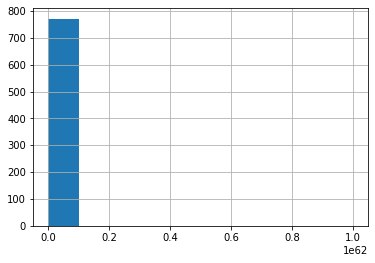

In [9]:
df2["Q12. 大学への通学時間は？（単位：分）"].hist()

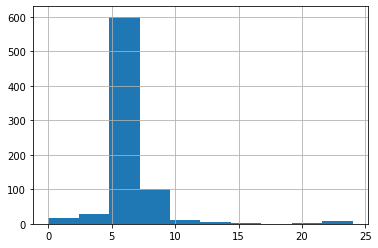

In [10]:
df2["Q14. １日あたりの睡眠時間は平均何時間？"].hist()

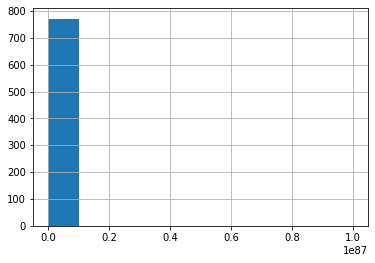

In [11]:
df2["Q15. 大学の成績(GPA)は？"].hist()

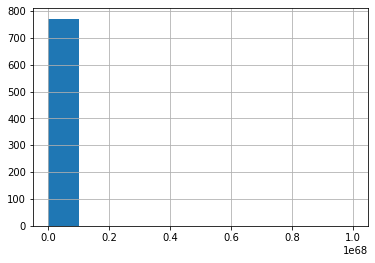

In [12]:
df2["Q16. 今、バイトは週何時間くらい？"].hist()

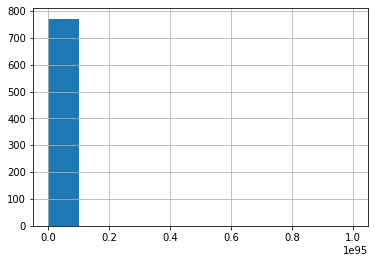

In [13]:
df2["Q17. 部活（またはサークル活動）は週何時間？"].hist()

In [14]:
import pandas as pd

outlier_df = pd.DataFrame()
colname = "Q12. 大学への通学時間は？（単位：分）"
outlier_min = df2[colname].median() - df2[colname].describe()['25%'] * 3
outlier_max = df2[colname].median() + df2[colname].describe()['75%'] * 3
outlier = df2[colname].apply(lambda x: x <= outlier_min or x >= outlier_max)
outlier_df[colname] = outlier
outlier_df

,Q12. 大学への通学時間は？（単位：分）
0,False
1,False
2,False
3,False
4,False
...,...
767,False
768,False
769,False
770,False


In [15]:
outlier_df = pd.DataFrame()

colnames = [
            "Q12. 大学への通学時間は？（単位：分）",
            "Q13. 朝ごはんは週何回くらい食べてる？",
            "Q14. １日あたりの睡眠時間は平均何時間？",
            "Q15. 大学の成績(GPA)は？",
            "Q16. 今、バイトは週何時間くらい？",
            "Q17. 部活（またはサークル活動）は週何時間？"
            ]

for colname in colnames:
    outlier_min = df2[colname].describe()['50%'] - df2[colname].describe()['25%'] * 3
    outlier_max = df2[colname].describe()['50%'] + df2[colname].describe()['75%'] * 3
    outlier = df2[colname].apply(lambda x: x <= outlier_min or x >= outlier_max)
    outlier_df[colname] = outlier

outlier_df

,Q12. 大学への通学時間は？（単位：分）,Q13. 朝ごはんは週何回くらい食べてる？,Q14. １日あたりの睡眠時間は平均何時間？,Q15. 大学の成績(GPA)は？,Q16. 今、バイトは週何時間くらい？,Q17. 部活（またはサークル活動）は週何時間？
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
767,False,False,False,False,False,True
768,False,False,False,False,False,True
769,False,False,False,False,False,False
770,False,False,False,False,False,True


In [16]:
print(list(outlier_df.sum(axis=1)))

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 3, 1, 1, 1, 2, 3, 4, 2, 3, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 

In [17]:
valid_ids = [i for i, x in enumerate(list(outlier_df.sum(axis=1))) if x == 0]
print(valid_ids)

[0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 14, 16, 18, 19, 20, 21, 22, 26, 28, 29, 30, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 57, 58, 59, 60, 61, 62, 63, 65, 66, 68, 69, 70, 72, 74, 75, 76, 82, 86, 88, 91, 93, 96, 101, 102, 104, 116, 119, 122, 124, 125, 126, 128, 130, 131, 133, 136, 139, 140, 141, 142, 144, 151, 152, 153, 155, 156, 157, 158, 161, 166, 167, 168, 170, 171, 172, 173, 174, 176, 178, 182, 183, 186, 188, 190, 191, 192, 198, 199, 201, 202, 204, 205, 206, 214, 215, 217, 222, 226, 230, 233, 234, 239, 243, 244, 246, 250, 251, 252, 254, 257, 259, 260, 261, 267, 268, 269, 271, 272, 273, 279, 282, 286, 288, 291, 296, 299, 305, 308, 311, 314, 315, 317, 318, 322, 323, 326, 337, 342, 345, 348, 349, 353, 356, 359, 361, 363, 364, 366, 367, 368, 369, 370, 374, 375, 376, 377, 383, 391, 392, 396, 397, 398, 399, 403, 404, 405, 406, 407, 409, 410, 412, 413, 414, 415, 419, 421, 423, 426, 427, 428, 430, 434, 435, 441, 442, 443, 444, 448, 450, 454, 460, 462, 465, 467,

In [18]:
df3 = df2.iloc[valid_ids, :]
df3

,Timestamp,Score,Pen name,Q1. Gender,Q2. 高校時代の英語の偏差値はどのくらい？,Q3. 高校時代の国語の偏差値はどのくらい？,Q4. 高校時代の数学の偏差値はどのくらい？,Q5. 高校時代の理科の偏差値はどのくらい？,Q6. 高校時代の社会の偏差値はどのくらい？,Q7. 高校時代の体育の成績を５段階評価で表すと？,Q8. 高校時代、勉強がどのくらい好きだったか５段階評価で,Q9. 浪人経験はありますか？,Q10. 今の大学は第一希望でしたか？,Q11. 今、実家暮らし？一人暮らし？,Q12. 大学への通学時間は？（単位：分）,Q13. 朝ごはんは週何回くらい食べてる？,Q14. １日あたりの睡眠時間は平均何時間？,Q15. 大学の成績(GPA)は？,Q16. 今、バイトは週何時間くらい？,Q17. 部活（またはサークル活動）は週何時間？,Q18. 彼氏または彼女はいる？,Q19. あなたはリア充ですか？５段階評価で,Unnamed: 22,Q20. 上記以外に、加えて欲しい質問項目などがありましたら教えてください。
0,5/18/2017 13:28:25,0.0,pp,男性 Male,50.0,50.0,55.0,60.0,60.0,4.0,3.0,ない（現役合格）,第二希望,実家,60.0,7.0,6.0,2.8,4.0,20.0,いる（２次元）,2.0,NaN,NaN
1,5/18/2017 13:28:37,0.0,chimp,男性 Male,70.0,60.0,70.0,70.0,60.0,4.0,3.0,ない（現役合格）,第一希望,実家,90.0,7.0,5.0,3.2,6.5,6.0,いない,1.0,NaN,NaN
2,5/18/2017 13:37:00,0.0,あんぱん,男性 Male,80.0,70.0,65.0,70.0,50.0,5.0,3.0,ない（現役合格）,第二希望,実家,90.0,7.0,6.0,2.4,0.0,15.0,いない,3.0,NaN,NaN
3,5/18/2017 13:40:12,0.0,あかさたな,男性 Male,40.0,50.0,55.0,55.0,50.0,3.0,3.0,ない（現役合格）,第一希望,一人,30.0,5.0,6.0,2.0,10.0,8.0,いる（リアル）,2.0,NaN,NaN
5,5/18/2017 13:37:15,0.0,com,男性 Male,58.0,50.0,60.0,60.0,50.0,4.0,3.0,ない（現役合格）,第一希望,実家,90.0,7.0,7.0,2.6,2.0,10.0,いる（リアル）,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,10/1/2020 22:12:17,0.0,cu,男性 Male,60.0,55.0,70.0,65.0,60.0,1.0,2.0,ない（現役合格）,第一希望,実家,45.0,6.0,7.5,2.5,0.0,5.0,いない,4.0,NaN,NaN
754,10/5/2020 12:00:06,0.0,ko,男性 Male,70.0,50.0,60.0,60.0,55.0,5.0,2.0,ない（現役合格）,第一希望,実家,6.0,7.0,7.0,2.6,7.0,8.0,いない,4.0,NaN,NaN
762,10/9/2020 14:04:54,0.0,theta,女性 Female,80.0,70.0,75.0,70.0,70.0,3.0,4.0,ない（現役合格）,第一希望,一人,50.0,5.0,5.0,3.0,9.0,10.0,いない,5.0,NaN,NaN
766,10/19/2020 20:49:17,0.0,Kimuchi_nabe,男性 Male,65.0,60.0,70.0,50.0,50.0,3.0,3.0,１浪,第一希望,実家,20.0,6.0,7.0,2.7,10.0,5.0,いる（リアル）,2.0,NaN,NaN


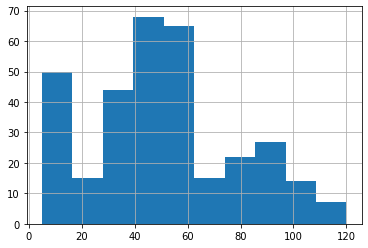

In [19]:
df3["Q12. 大学への通学時間は？（単位：分）"].hist()

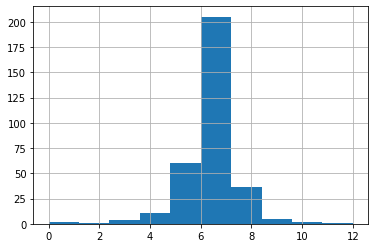

In [20]:
df3["Q14. １日あたりの睡眠時間は平均何時間？"].hist()

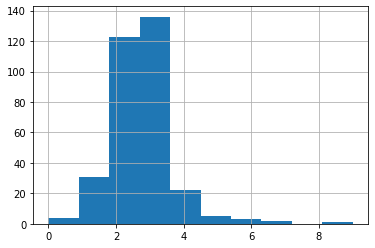

In [21]:
df3["Q15. 大学の成績(GPA)は？"].hist()

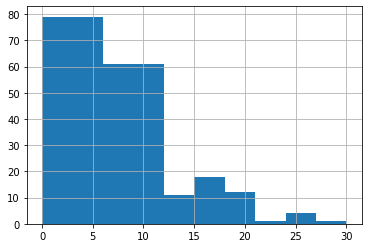

In [22]:
df3["Q16. 今、バイトは週何時間くらい？"].hist()

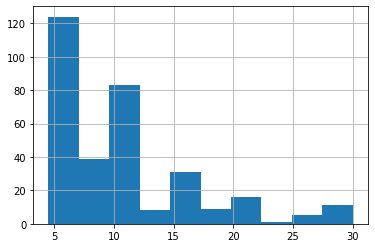

In [23]:
df3["Q17. 部活（またはサークル活動）は週何時間？"].hist()

In [24]:
!pip install japanize-matplotlib

Text(0, 0.5, 'Q14. １日あたりの睡眠時間は平均何時間？')

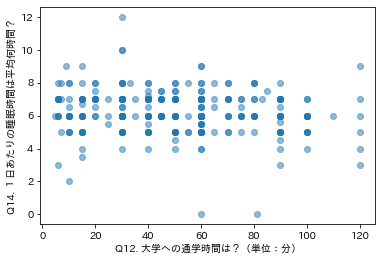

In [25]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.scatter(
    df3["Q12. 大学への通学時間は？（単位：分）"], 
    df3["Q14. １日あたりの睡眠時間は平均何時間？"],
    alpha=0.5
    )
plt.xlabel("Q12. 大学への通学時間は？（単位：分）")
plt.ylabel("Q14. １日あたりの睡眠時間は平均何時間？")

In [26]:
q18 = list(set(df3["Q18. 彼氏または彼女はいる？"]))
q18

['いない', 'いる（リアル）', 'いる（２次元）']

In [27]:
q18_0 = df3[df3["Q18. 彼氏または彼女はいる？"] == q18[0]]
q18_1 = df3[df3["Q18. 彼氏または彼女はいる？"] == q18[1]]
q18_2 = df3[df3["Q18. 彼氏または彼女はいる？"] == q18[2]]

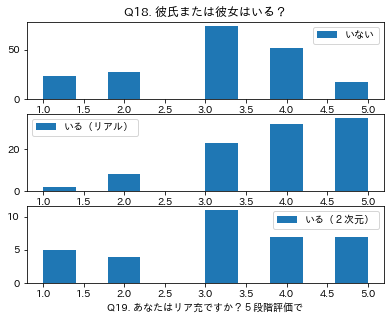

In [28]:
fig = plt.figure(figsize=(6.4, 4.8))
ax = fig.add_subplot(311)
plt.title("Q18. 彼氏または彼女はいる？")
plt.hist(q18_0["Q19. あなたはリア充ですか？５段階評価で"], label=q18[0])
plt.legend()
ax = fig.add_subplot(312)
plt.hist(q18_1["Q19. あなたはリア充ですか？５段階評価で"], label=q18[1])
plt.legend()
ax = fig.add_subplot(313)
plt.hist(q18_2["Q19. あなたはリア充ですか？５段階評価で"], label=q18[2])
plt.legend()
plt.xlabel("Q19. あなたはリア充ですか？５段階評価で")
plt.show()

In [29]:
!date

Mon Jan  4 03:52:49 UTC 2021
